In [1]:
%matplotlib notebook
import matplotlib.pyplot as plt

import sys
sys.path.append("..")
sys.path.append("../../DolphinRL/Source")

import numpy as np
import asyncio
from SpinnyEnv import SpinnyEnv


import matplotlib.pyplot as plt
import matplotlib.image as mpimg

In [2]:
import logging
import sys
    
root = logging.getLogger()
root.setLevel(logging.INFO)

handler = logging.StreamHandler(sys.stdout)
handler.setLevel(logging.DEBUG)
formatter = logging.Formatter('%(asctime)s - %(name)s - %(levelname)s - %(message)s')
handler.setFormatter(formatter)
root.addHandler(handler)

In [8]:
env = SpinnyEnv()
future = asyncio.ensure_future(env.interface.run())

2021-05-25 21:59:09,880 - root - INFO - Receiving video
2021-05-25 21:59:09,915 - aioice.ice - INFO - Connection(3) Check CandidatePair(('fd00::980d:8f21:b9ce:2fa8', 35623) -> ('fd00::9676:4daa:b08e:16f7', 41127)) State.FROZEN -> State.WAITING
2021-05-25 21:59:09,916 - aioice.ice - INFO - Connection(3) Check CandidatePair(('fd00::d039:3f13:ae60:9257', 43850) -> ('fd00::9676:4daa:b08e:16f7', 41127)) State.FROZEN -> State.WAITING
2021-05-25 21:59:09,917 - aioice.ice - INFO - Connection(3) Check CandidatePair(('192.168.178.36', 44844) -> ('192.168.178.40', 45784)) State.FROZEN -> State.WAITING
2021-05-25 21:59:09,920 - aioice.ice - INFO - Connection(3) Check CandidatePair(('fd00::980d:8f21:b9ce:2fa8', 35623) -> ('fd00::9676:4daa:b08e:16f7', 41127)) State.WAITING -> State.IN_PROGRESS
2021-05-25 21:59:09,934 - aioice.ice - INFO - Connection(3) Check CandidatePair(('fd00::980d:8f21:b9ce:2fa8', 35623) -> ('fd00::9676:4daa:b08e:16f7', 41127)) State.IN_PROGRESS -> State.SUCCEEDED
2021-05-25 21:

In [9]:
obs = await env.reset()

-20
106.24052000131954 False


<IPython.core.display.Javascript object>


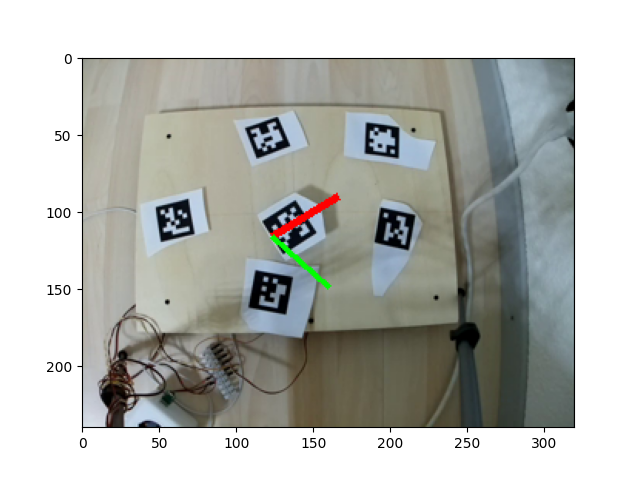

In [14]:
for i in range(1):
    obs, reward, done, _ = await env.step(np.int64(0))


    print(reward, done)
    imgplot = plt.imshow(obs)

In [15]:
await env.close()
await future

2021-05-25 22:00:29,129 - root - INFO - Signalling closed
2021-05-25 22:00:29,132 - root - INFO - Peer connection closed


In [25]:
import cv2

In [ ]:
arucoDict = cv2.aruco.Dictionary_get(cv2.aruco.DICT_6X6_100)
arucoParams = cv2.aruco.DetectorParameters_create()

open_cv_image = np.array(obs.convert('RGB')) 
# Convert RGB to BGR 
open_cv_image = open_cv_image[:, :, ::-1].copy() 


corners, ids, rejected = cv2.aruco.detectMarkers(open_cv_image, arucoDict, parameters=arucoParams)



In [9]:
obs.save("obs.jpg")

In [81]:
from PIL import Image, ImageDraw
import random
import math
obs = PIL.Image.open("obs.jpg")

target_angle = 112-190 # random.randrange(0,359)
print(target_angle)
target_angle_rad = target_angle / 360 * (2 * math.pi)  
target_dir = np.array([math.cos(target_angle_rad), math.sin(target_angle_rad)])

marker_id = 75
index = ids.reshape(-1).tolist().index(marker_id)
marker_corners = corners[index][0]

line_from = (marker_corners[0] + marker_corners[1]) * 0.5
line_to = (marker_corners[2] + marker_corners[3]) * 0.5
direction = line_to - line_from
direction = direction / np.linalg.norm(direction)
line_to = line_from + direction * 50
line_to_target = line_from + target_dir * 50

draw = ImageDraw.Draw(obs)
draw.line([*line_from, *line_to], fill=255, width=5)
draw.line([*line_from, *line_to_target], fill=(0, 255, 0), width=5)

actual_angle = math.atan2(direction[1], direction[0])
print(actual_angle / (2 * math.pi)  * 360)

angle_deviation = math.acos(np.dot(direction, target_dir))
print(angle_deviation / (2 * math.pi)  * 360)

#cv2.aruco.drawDetectedMarkers(open_cv_image, [corners[index]])
#open_cv_image = open_cv_image[:, :, ::-1].copy() 
imgplot = plt.imshow(obs)

-78


ValueError: 75 is not in list

## 